# USA Bike sharing assignment:
**Problem Statement:** A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. BoomBikes aspires to understand the demand for shared bikes among the people. So, the company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Reading and Understanding the dataset:

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the dataset
bike = pd.read_csv('day.csv')

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
#Check the description of all the numeric variables
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


*Comment: By just looking at the descriptives, data looks fine. However, we can look into these variables with more detail.*

In [7]:
#To check the null values and datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


*Comment: We don't have any missing value for any variable in the dataset, however all of the variables except 'dteday' are numeric which needs to be checked further and correct their datatype, if needed. Also, we have see in the data that, few numeric variables are actually categorical in nature and each value has some meaning to it, which I can find in data dictionary. So lets go through such variables and convert them into categorical variables*

### Data pre-processing and EDA:

In [8]:
#checking 'season' variable
bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
# We have labels for these codes and we can convert season variable into categorical one.
bike['season'] = bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [10]:
bike['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [11]:
#checking 'yr' variable
bike['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

Comment: No need to change the values as those are already in the form of 0s and 1s.

In [12]:
#Checking 'mnth' variable
bike['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [13]:
bike['mnth'] = bike['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                                 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [14]:
bike['mnth'].value_counts()

Dec    62
Jul    62
Aug    62
Jan    62
Mar    62
May    62
Oct    62
Nov    60
Apr    60
Sep    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [15]:
#checking 'holiday' variable
bike['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

*Comment: No need to convert this variable to categorical as later we don't need to convert it to dummy encoding as it has only 2 values 0 and 1.*

In [16]:
# checking 'weekday' variable
bike['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [17]:
bike['weekday'] = bike['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [18]:
bike['weekday'].value_counts()

Tue    105
Mon    105
Fri    104
Thu    104
Wed    104
Sun    104
Sat    104
Name: weekday, dtype: int64

In [19]:
# checking 'workingday' variabe
bike['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

*Comment: No need to convert this variable to categorical as later we don't need to convert it to dummy encoding as it has only 2 values 0 and 1.*

In [20]:
# checking 'weathersit' variable
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
bike['weathersit']=bike['weathersit'].map({1:'Clear',2:'Mist',3:'LightSnow',4:'HeavyRain'})

In [22]:
bike['weathersit'].value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

*Comment: In the data dictionary we have total 4 values and labels, but in the data we have just 3 values. Though mapping has been done for 4th value as well in case new data has this value present.* 

In [23]:
#converting 'dteday' from object to datetime
bike['dteday'] = bike['dteday'].astype('datetime64')

In [24]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

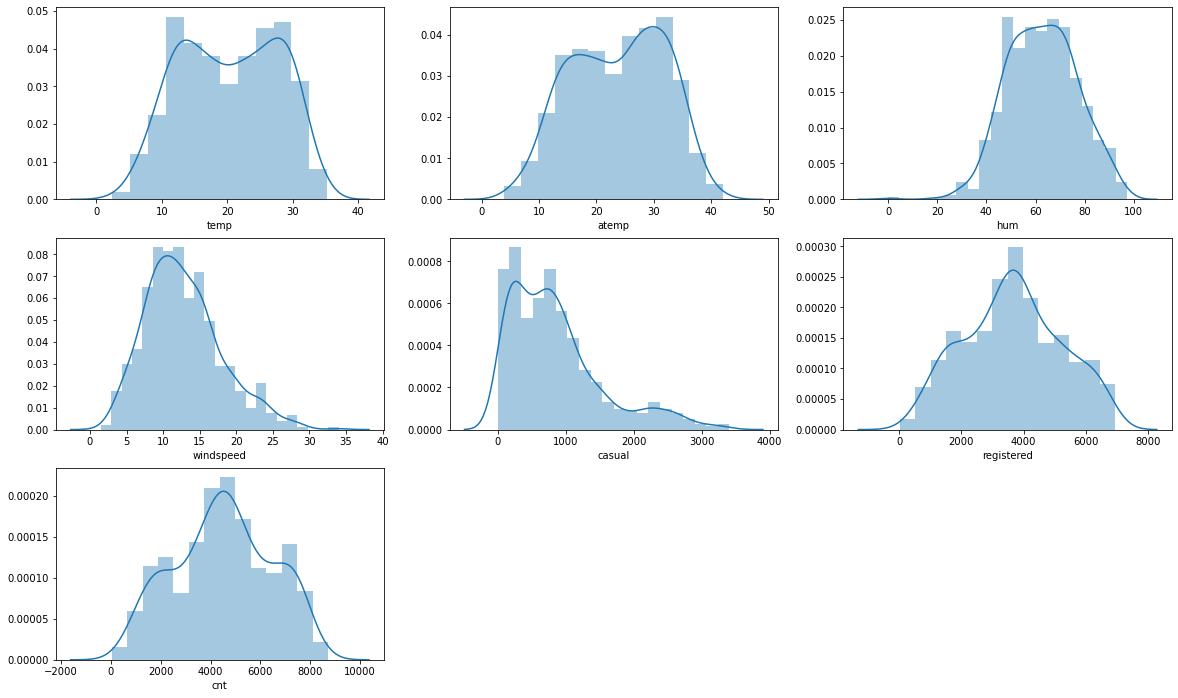

In [25]:
# lets check the distribution of data for numeric variables like temp, atemp, hum, windspeed, casual, registered, cnt
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.distplot(bike['temp'])
plt.subplot(3,3,2)
sns.distplot(bike['atemp'])
plt.subplot(3,3,3)
sns.distplot(bike['hum'])
plt.subplot(3,3,4)
sns.distplot(bike['windspeed'])
plt.subplot(3,3,5)
sns.distplot(bike['casual'])
plt.subplot(3,3,6)
sns.distplot(bike['registered'])
plt.subplot(3,3,7)
sns.distplot(bike['cnt'])
plt.show()

*Comment:*
- temp and atemp variables are not following exact normal distriution or bell curve, but we can clearly see that data is centered towards mean. So we can safely assume that, data is normally distributed.
- hum, windspeed, registered and cnt variables are following normal distribution
- casual variable is following right skewed normal distribution and this is not an issue.

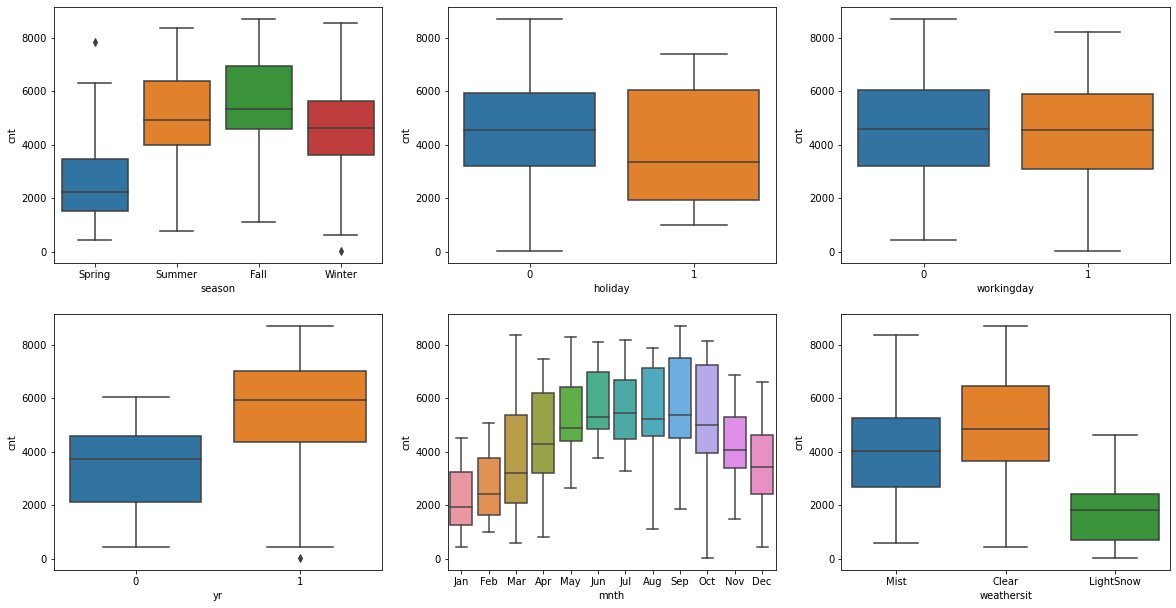

In [26]:
# Lets check the distribution of few imp categorical variables - season, holiday, workingday, yr, mnth, weathersit
plt.figure(figsize=(20,16))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike)

plt.show()

Comments:
- We can clearly see that there are hardly any outliers in categorical variables w.r.t. cnt and also data distribution seems fine.
- Also we can see that, bike sharing count was high in 2019 and it is usually high in summer and fall or during June to October month.
- It can be seen clearly that, during light snow and raining, people less likely to choose the option of bikes.

<Figure size 1440x1440 with 0 Axes>

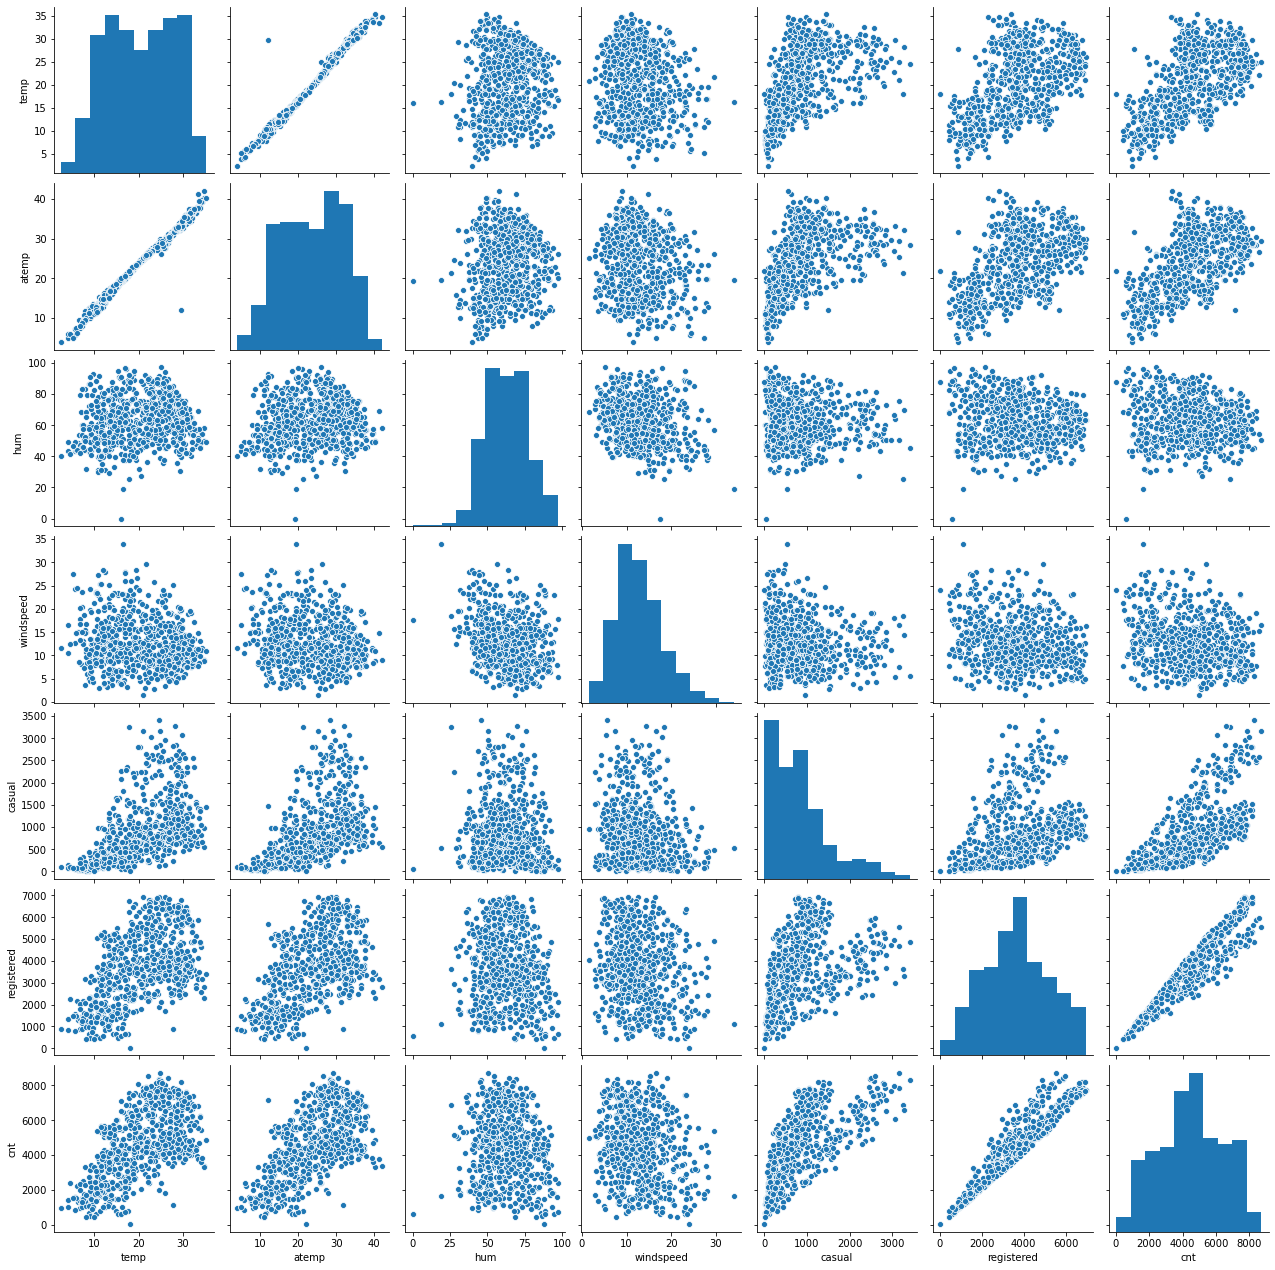

In [27]:
# Checking the relationship of numeric variables with each other using scatter plots
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

plt.figure(figsize=(20,20))
sns.pairplot(bike[num_vars])
plt.show()

Comments:
- We can definitely draw/build linear regression model as few variables (temp, atemp, casual, registered) are following positive correlation with target variable 'cnt'

However, lets see by how much value they are correleted with each other and see if we can ignore few variables considering multi-collinearity.

In [28]:
# checking correlation values for numeric variables
cor = bike[num_vars].corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


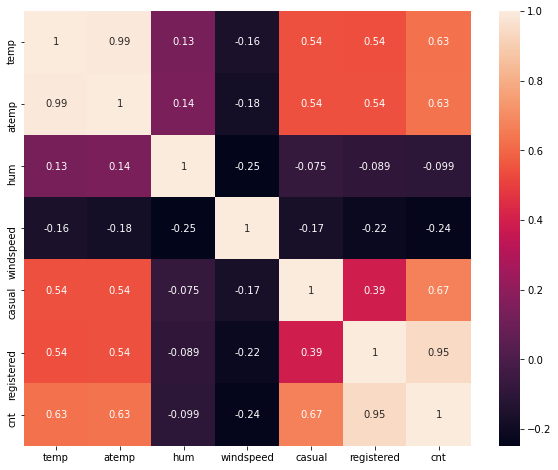

In [29]:
#plotting heatmap for ease visualization
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)
plt.show()

Comments:
- temp and atemp are highly correlated. Hence we can drop atemp from the dataset during our model building.
- Also since 'cnt' variable is actually sum of casual and registered variable, it is following similar relationship with other variables like temp, hum, windspeed. So we can drop both these variables from the dataset during model building.

### Data Preparation:

In [30]:
# As mentioned above lets drop variables atemp, casual and registered
bike.drop(['atemp','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 13)

In [31]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,2018-01-01,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,2,2018-02-01,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801
2,3,2018-03-01,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,4,2018-04-01,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,5,2018-05-01,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [32]:
#Lets drop variable 'instant' and 'dteday' as those are not useful for our analysis and model building
bike.drop(['instant','dteday'],axis=1,inplace=True)
bike.shape

(730, 11)

In [33]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [34]:
#Lets do the dummy encoding for categorical variables.
bike_dummies = pd.get_dummies(bike[['season','mnth','weekday','weathersit']],drop_first=True)
bike_dummies

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
bike = bike.drop(['season','mnth','weekday','weathersit'],axis=1)

In [36]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,1,14.110847,80.5833,10.749882,985
1,0,0,1,14.902598,69.6087,16.652113,801
2,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,1,9.305237,43.6957,12.522300,1600


In [37]:
# Lets merge bike and bike_dummies datasets
bike = pd.concat([bike, bike_dummies],axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   hum                   730 non-null    float64
 5   windspeed             730 non-null    float64
 6   cnt                   730 non-null    int64  
 7   season_Spring         730 non-null    uint8  
 8   season_Summer         730 non-null    uint8  
 9   season_Winter         730 non-null    uint8  
 10  mnth_Aug              730 non-null    uint8  
 11  mnth_Dec              730 non-null    uint8  
 12  mnth_Feb              730 non-null    uint8  
 13  mnth_Jan              730 non-null    uint8  
 14  mnth_Jul              730 non-null    uint8  
 15  mnth_Jun              7

## Model preparation and Building:

#### Splitting the data into train and split

In [39]:
# import sklearn
from sklearn.model_selection import train_test_split

In [40]:
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size=0.7,random_state=100)

In [41]:
bike_train.shape

(510, 29)

In [42]:
bike_test.shape

(220, 29)

In [43]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


#### Resclating the features -> temp, hum, windspeed and cnt

In [44]:
# Let's use minmax scaling
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
#applying scaling to temp, hum, windspeed and cnt variables
a = ['temp','hum','windspeed','cnt']
bike_train[a] = scaler.fit_transform(bike_train[a])

In [47]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [48]:
bike_train[a].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [49]:
#check the correlation matrix again and start building the model by picking up variables of interest.
bike_train.corr()['cnt']

yr                      0.591433
holiday                -0.095948
workingday             -0.009071
temp                    0.645048
hum                    -0.058793
windspeed              -0.253038
cnt                     1.000000
season_Spring          -0.548987
season_Summer           0.140259
season_Winter           0.025945
mnth_Aug                0.227578
mnth_Dec               -0.143546
mnth_Feb               -0.270351
mnth_Jan               -0.378296
mnth_Jul                0.158087
mnth_Jun                0.195411
mnth_Mar               -0.137465
mnth_May                0.113276
mnth_Nov               -0.048002
mnth_Oct                0.055558
mnth_Sep                0.201639
weekday_Mon            -0.071013
weekday_Sat             0.012712
weekday_Sun             0.031474
weekday_Thu             0.110734
weekday_Tue            -0.018672
weekday_Wed            -0.020949
weathersit_LightSnow   -0.226678
weathersit_Mist        -0.169715
Name: cnt, dtype: float64

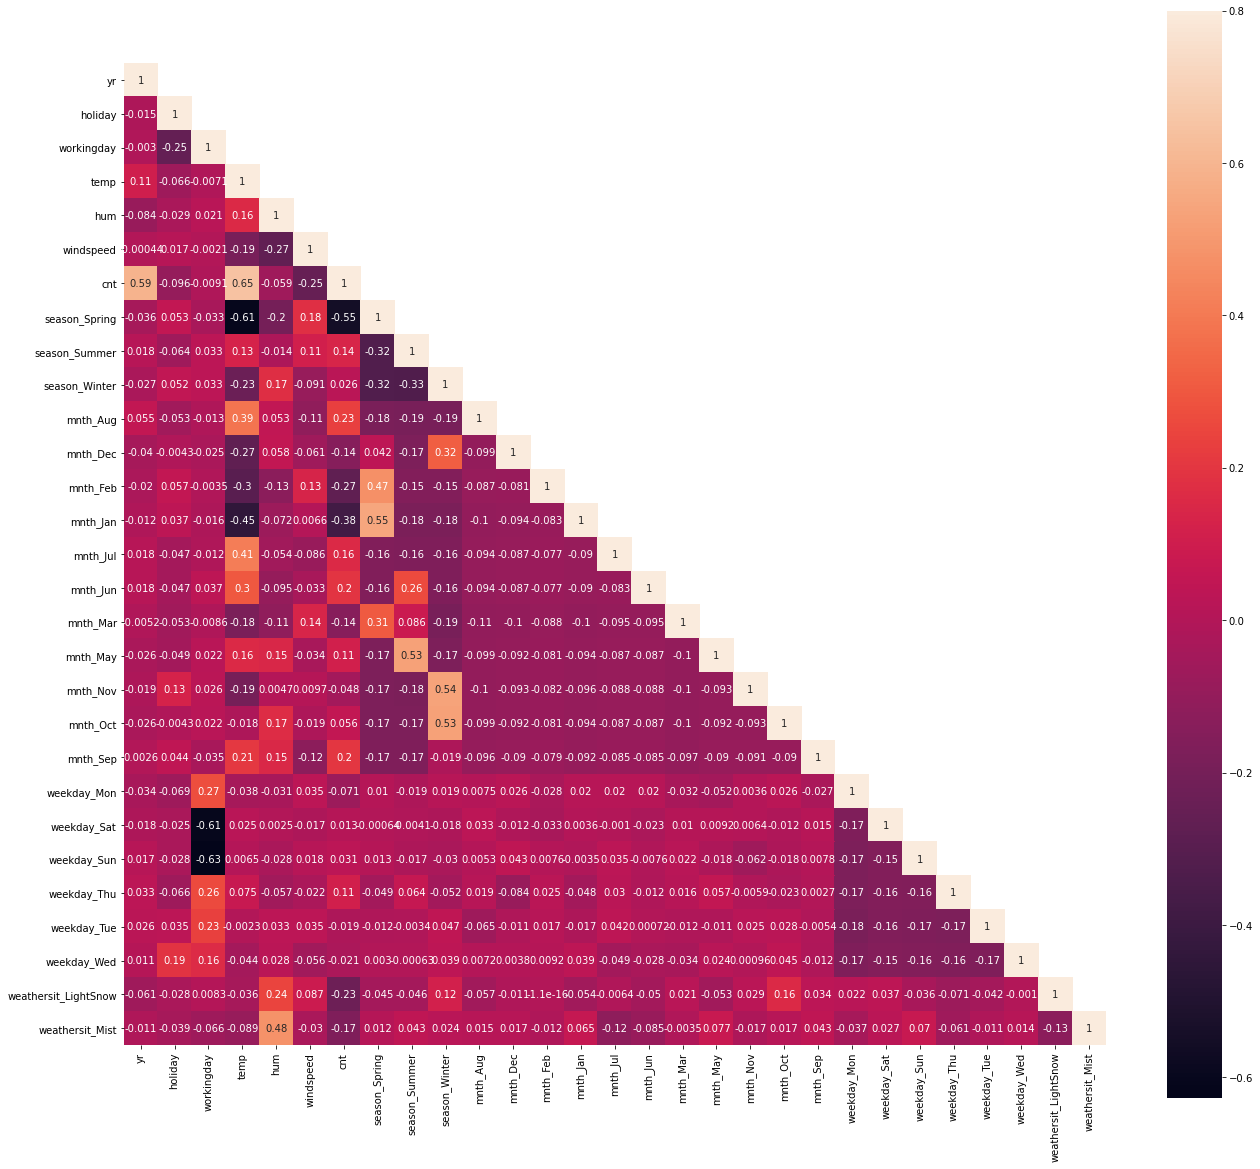

In [50]:
# For better visual understanding.
# plt.figure(figsize=(25,25))
# sns.heatmap(bike_train.corr(),annot=True)
# plt.show()

mask = np.array(bike_train.corr())
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(22,20)
sns.heatmap(bike_train.corr(), mask=mask, vmax=0.8, square=True, annot=True);

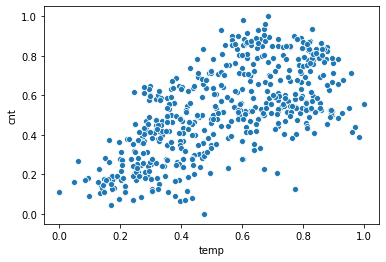

In [51]:
# We can see that temp variable is highly correlated with cnt variable, so lets check the scatter plot
sns.scatterplot(bike_train.temp,bike_train.cnt)
plt.show()

Lets try to build a model based on temp variable


In [52]:
# Lets divide the X and y sets for model
y_train = bike_train.pop('cnt')
X_train = bike_train

In [53]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [54]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


### Building a linear model:

In [55]:
# I'm using statsmodels to get more stats about the models
import statsmodels.api as sm

In [56]:
X_train_lm = sm.add_constant(X_train[['temp']])

In [57]:
X_train_lm.head()

,const,temp
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666
111,1.0,0.345824


In [58]:
# fit the model
lr = sm.OLS(y_train,X_train_lm).fit()

In [59]:
# to see the values of parameters
lr.params

const    0.169031
temp     0.640944
dtype: float64

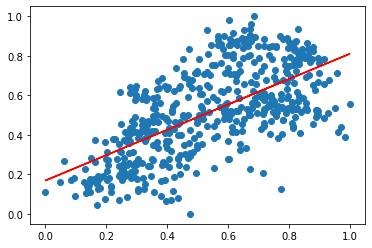

In [60]:
# visualising the data in scatter plot and fit the line
plt.scatter(X_train_lm.iloc[:,1], y_train)
plt.plot(X_train_lm.iloc[:,1], 0.169 + 0.641*X_train_lm.iloc[:,1], 'r')
plt.show()

In [61]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           2.46e-61
Time:                        15:59:41   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

Comments:
 - Above model was built just on 1 variable 'temp' to check if everything is working fine and now lets start building sets of models using backward features elimination.

#### Model - #1

In [62]:
# Now lets add all the variables and see how the model looks like as variables are more and 
# then we can use backward feature elimination process.

In [63]:
# Adding the constant
X_train_lm = sm.add_constant(X_train[['yr','holiday','workingday','temp','hum','windspeed',
                                      'season_Spring','season_Summer','season_Winter','mnth_Aug','mnth_Dec','mnth_Feb',
                                      'mnth_Jan','mnth_Jul','mnth_Jun','mnth_Mar','mnth_May','mnth_Nov','mnth_Oct',
                                      'mnth_Sep','weekday_Mon','weekday_Sat','weekday_Sun','weekday_Thu','weekday_Tue',
                                      'weekday_Wed','weathersit_LightSnow','weathersit_Mist']])

# fitting the model
lr = sm.OLS(y_train,X_train_lm).fit()


In [64]:
# check paramters
lr.params

const                   0.391163
yr                      0.231135
holiday                -0.134754
workingday             -0.060049
temp                    0.440512
hum                    -0.157355
windspeed              -0.182486
season_Spring          -0.040386
season_Summer           0.046443
season_Winter           0.112621
mnth_Aug                0.027307
mnth_Dec               -0.044387
mnth_Feb               -0.037422
mnth_Jan               -0.064209
mnth_Jul               -0.028504
mnth_Jun                0.008393
mnth_Mar                0.000800
mnth_May                0.024732
mnth_Nov               -0.039553
mnth_Oct                0.005634
mnth_Sep                0.090823
weekday_Mon            -0.024621
weekday_Sat            -0.055719
weekday_Sun            -0.049460
weekday_Thu             0.004227
weekday_Tue            -0.026072
weekday_Wed            -0.010225
weathersit_LightSnow   -0.249947
weathersit_Mist        -0.057848
dtype: float64

In [65]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.34e-178
Time:                        15:59:41   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3912 

Comments:
 - R-squared and adjusted R-squared values looks good, but there are few insignificant variables in the current model, so lets remove such variables one by one and run the model again.

#### Model - #2

In [66]:
def stats_model():
    X_train_lm = sm.add_constant(X_train_new)
    lr = sm.OLS(y_train,X_train_lm).fit()
    return lr.summary()

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif():
    # X_train_new = X_train_new.drop('const',axis=1)
    vif = pd.DataFrame()
    vif['features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [68]:
X_train_new = X_train.drop(['mnth_Mar'],axis=1)

In [69]:
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.32e-179
Time:                        15:59:42   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     482   BIC:                            -871.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3917      0.084      4.684      0.000       0.227       0.556
yr                       0.2311      0.008     28.414      0.000       0.215       0.247
holiday                 -0.1348      0.065     -2.061      0.040      -0.263      -0.006
workingday              -0.0600      0.071     -0.845      0.399      -0.200       0.080
temp                     0.4403      0.046      9.550      0.000       0.350       0.531
hum                     -0.1573      0.039     -4.057      0.000      -0.233      -0.081
windspeed               -0.1825      0.026     -7.020      0.000      -0.234      -0.131
season_Spring           -0.0401      0.029     -1.401      0.162      -0.096       0.016
season_Summer            0.0463      0.026      1.790      0.074      -0.005       0.097
season_Winter            0.1128      0.028      4.075      0.000       0.058       0.167
mnth_Aug                 0.0269      0.032      0.843      0.399      -0.036       0.090
mnth_Dec                -0.0451      0.026     -1.718      0.086      -0.097       0.006
mnth_Feb                -0.0382      0.022     -1.699      0.090      -0.082       0.006
mnth_Jan                -0.0650      0.023     -2.883      0.004      -0.109      -0.021
mnth_Jul                -0.0288      0.034     -0.858      0.391      -0.095       0.037
mnth_Jun                 0.0081      0.024      0.344      0.731      -0.038       0.055
mnth_May                 0.0245      0.020      1.233      0.218      -0.015       0.064
mnth_Nov                -0.0402      0.031     -1.293      0.197      -0.101       0.021
mnth_Oct                 0.0050      0.031      0.162      0.871      -0.056       0.066
mnth_Sep                 0.0904      0.029      3.092      0.002       0.033       0.148
weekday_Mon             -0.0246      0.015     -1.692      0.091      -0.053       0.004
weekday_Sat             -0.0557      0.072     -0.778      0.437      -0.196       0.085
weekday_Sun             -0.0494      0.072     -0.691      0.490      -0.190       0.091
weekday_Thu              0.0042      0.015      0.283      0.778      -0.025       0.034
weekday_Tue             -0.0261      0.015     -1.778      0.076      -0.055       0.003
weekday_Wed             -0.0102      0.015     -0.671      0.503      -0.040       0.020
weathersit_LightSnow    -0.2499      0.027     -9.390      0.000      -0.302      -0.198
weathersit_Mist         -0.0579      0.011     -5.502      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.028   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.533
Skew:                          -0.762   Prob(JB):                     2.34e-45
Kurtosis

Comments:
 - R-squared and adjusted R-squared values looks good, but there are few insignificant variables in the current model, so lets remove such variables one by one and run the model again.
 - Also, F-Statistics value of this model has been improved from the previous one, so we are on right track.

#### Model - #3

In [70]:
X_train_new = X_train_new.drop(['mnth_Oct','mnth_Jun'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.28e-181
Time:                        15:59:42   Log-Likelihood:                 522.92
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     484   BIC:                            -883.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3930      0.083      4.738      0.000       0.230       0.556
yr                       0.2309      0.008     28.568      0.000       0.215       0.247
holiday                 -0.1346      0.065     -2.062      0.040      -0.263      -0.006
workingday              -0.0595      0.071     -0.839      0.402      -0.199       0.080
temp                     0.4484      0.039     11.548      0.000       0.372       0.525
hum                     -0.1583      0.038     -4.152      0.000      -0.233      -0.083
windspeed               -0.1833      0.026     -7.111      0.000      -0.234      -0.133
season_Spring           -0.0434      0.027     -1.616      0.107      -0.096       0.009
season_Summer            0.0434      0.023      1.847      0.065      -0.003       0.090
season_Winter            0.1122      0.023      4.898      0.000       0.067       0.157
mnth_Aug                 0.0195      0.024      0.819      0.413      -0.027       0.066
mnth_Dec                -0.0473      0.018     -2.570      0.010      -0.083      -0.011
mnth_Feb                -0.0380      0.022     -1.757      0.080      -0.081       0.004
mnth_Jan                -0.0643      0.021     -2.998      0.003      -0.106      -0.022
mnth_Jul                -0.0367      0.025     -1.473      0.141      -0.086       0.012
mnth_May                 0.0213      0.017      1.217      0.224      -0.013       0.056
mnth_Nov                -0.0437      0.019     -2.274      0.023      -0.081      -0.006
mnth_Sep                 0.0840      0.022      3.885      0.000       0.042       0.127
weekday_Mon             -0.0244      0.015     -1.680      0.094      -0.053       0.004
weekday_Sat             -0.0552      0.071     -0.773      0.440      -0.196       0.085
weekday_Sun             -0.0489      0.071     -0.686      0.493      -0.189       0.091
weekday_Thu              0.0040      0.015      0.268      0.789      -0.025       0.033
weekday_Tue             -0.0261      0.015     -1.782      0.075      -0.055       0.003
weekday_Wed             -0.0102      0.015     -0.670      0.503      -0.040       0.020
weathersit_LightSnow    -0.2498      0.027     -9.405      0.000      -0.302      -0.198
weathersit_Mist         -0.0577      0.010     -5.510      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       76.982   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.287
Skew:                          -0.758   Prob(JB):                     5.31e-44
Kurtosis:                       5.661   Cond. No.                         70.0
==============================================================================

Warnings:
[1] Standard Erro

Comments:
 - R-squared and adjusted R-squared values looks good, but there are few insignificant variables in the current model, so lets remove such variables one by one and run the model again.
 - Also, F-Statistics value of this model has been improved from the previous one.

#### Model - #4

In [71]:
X_train_new = X_train_new.drop(['weekday_Thu'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.22e-182
Time:                        15:59:42   Log-Likelihood:                 522.88
No. Observations:                 510   AIC:                            -995.8
Df Residuals:                     485   BIC:                            -889.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3950      0.083      4.786      0.000       0.233       0.557
yr                       0.2309      0.008     28.619      0.000       0.215       0.247
holiday                 -0.1346      0.065     -2.064      0.040      -0.263      -0.006
workingday              -0.0593      0.071     -0.838      0.402      -0.198       0.080
temp                     0.4482      0.039     11.556      0.000       0.372       0.524
hum                     -0.1586      0.038     -4.164      0.000      -0.233      -0.084
windspeed               -0.1833      0.026     -7.121      0.000      -0.234      -0.133
season_Spring           -0.0434      0.027     -1.618      0.106      -0.096       0.009
season_Summer            0.0436      0.023      1.859      0.064      -0.002       0.090
season_Winter            0.1125      0.023      4.917      0.000       0.068       0.157
mnth_Aug                 0.0198      0.024      0.830      0.407      -0.027       0.067
mnth_Dec                -0.0476      0.018     -2.595      0.010      -0.084      -0.012
mnth_Feb                -0.0379      0.022     -1.752      0.080      -0.080       0.005
mnth_Jan                -0.0644      0.021     -3.003      0.003      -0.106      -0.022
mnth_Jul                -0.0363      0.025     -1.459      0.145      -0.085       0.013
mnth_May                 0.0214      0.017      1.225      0.221      -0.013       0.056
mnth_Nov                -0.0439      0.019     -2.288      0.023      -0.082      -0.006
mnth_Sep                 0.0842      0.022      3.896      0.000       0.042       0.127
weekday_Mon             -0.0263      0.013     -2.107      0.036      -0.051      -0.002
weekday_Sat             -0.0570      0.071     -0.803      0.422      -0.197       0.083
weekday_Sun             -0.0508      0.071     -0.716      0.474      -0.190       0.089
weekday_Tue             -0.0281      0.013     -2.228      0.026      -0.053      -0.003
weekday_Wed             -0.0122      0.013     -0.911      0.363      -0.038       0.014
weathersit_LightSnow    -0.2504      0.026     -9.481      0.000      -0.302      -0.199
weathersit_Mist         -0.0578      0.010     -5.526      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.293   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.659
Skew:                          -0.760   Prob(JB):                     2.68e-44
Kurtosis:                       5.671   Cond. No.                         69.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
calc_vif()

,features,VIF
2,workingday,54.55
4,hum,39.11
3,temp,29.71
19,weekday_Sun,10.82
18,weekday_Sat,10.44
6,season_Spring,10.24
7,season_Summer,8.04
8,season_Winter,7.81
5,windspeed,5.50
9,mnth_Aug,3.44


Comments:
 - R-squared and adjusted R-squared values looks good, but there are few insignificant variables in the current model, so lets remove such variables one by one and run the model again.
 - Also, F-Statistics value of this model has been improved from the previous one.
 - We have also checked the VIF now, and workingday variable has very high VIF value, so lets remove it and run the model again

#### Model - #5

In [73]:
X_train_new = X_train_new.drop(['workingday'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.7
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.56e-183
Time:                        15:59:42   Log-Likelihood:                 522.51
No. Observations:                 510   AIC:                            -997.0
Df Residuals:                     486   BIC:                            -895.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3346      0.040      8.319      0.000       0.256       0.414
yr                       0.2313      0.008     28.733      0.000       0.216       0.247
holiday                 -0.0845      0.026     -3.244      0.001      -0.136      -0.033
temp                     0.4490      0.039     11.586      0.000       0.373       0.525
hum                     -0.1575      0.038     -4.140      0.000      -0.232      -0.083
windspeed               -0.1839      0.026     -7.146      0.000      -0.234      -0.133
season_Spring           -0.0431      0.027     -1.606      0.109      -0.096       0.010
season_Summer            0.0437      0.023      1.862      0.063      -0.002       0.090
season_Winter            0.1123      0.023      4.909      0.000       0.067       0.157
mnth_Aug                 0.0194      0.024      0.815      0.415      -0.027       0.066
mnth_Dec                -0.0473      0.018     -2.578      0.010      -0.083      -0.011
mnth_Feb                -0.0374      0.022     -1.734      0.084      -0.080       0.005
mnth_Jan                -0.0641      0.021     -2.993      0.003      -0.106      -0.022
mnth_Jul                -0.0366      0.025     -1.472      0.142      -0.085       0.012
mnth_May                 0.0210      0.017      1.205      0.229      -0.013       0.055
mnth_Nov                -0.0455      0.019     -2.389      0.017      -0.083      -0.008
mnth_Sep                 0.0843      0.022      3.905      0.000       0.042       0.127
weekday_Mon             -0.0264      0.012     -2.109      0.035      -0.051      -0.002
weekday_Sat              0.0015      0.013      0.110      0.912      -0.025       0.027
weekday_Sun              0.0077      0.013      0.587      0.557      -0.018       0.033
weekday_Tue             -0.0278      0.013     -2.206      0.028      -0.053      -0.003
weekday_Wed             -0.0113      0.013     -0.850      0.396      -0.037       0.015
weathersit_LightSnow    -0.2503      0.026     -9.478      0.000      -0.302      -0.198
weathersit_Mist         -0.0576      0.010     -5.515      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       76.762   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.819
Skew:                          -0.761   Prob(JB):                     3.01e-43
Kurtosis:                       5.627   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
calc_vif()

,features,VIF
3,hum,33.66
2,temp,21.37
5,season_Spring,7.27
7,season_Winter,5.97
6,season_Summer,5.79
4,windspeed,4.96
8,mnth_Aug,3.14
12,mnth_Jul,2.81
11,mnth_Jan,2.41
22,weathersit_Mist,2.36


Comments:
 - R-squared and adjusted R-squared values looks good, but there are few insignificant variables in the current model, so lets remove such variables one by one and run the model again.
 - Also, F-Statistics value of this model has been improved from the previous one, so we are on right track.

#### Model -#6

In [75]:
X_train_new = X_train_new.drop(['mnth_Aug'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.2
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.92e-184
Time:                        15:59:43   Log-Likelihood:                 522.17
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     487   BIC:                            -900.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3452      0.038      9.079      0.000       0.271       0.420
yr                       0.2315      0.008     28.780      0.000       0.216       0.247
holiday                 -0.0850      0.026     -3.268      0.001      -0.136      -0.034
temp                     0.4514      0.039     11.683      0.000       0.375       0.527
hum                     -0.1561      0.038     -4.109      0.000      -0.231      -0.081
windspeed               -0.1840      0.026     -7.154      0.000      -0.235      -0.133
season_Spring           -0.0555      0.022     -2.510      0.012      -0.099      -0.012
season_Summer            0.0306      0.017      1.791      0.074      -0.003       0.064
season_Winter            0.1008      0.018      5.599      0.000       0.065       0.136
mnth_Dec                -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_Feb                -0.0374      0.022     -1.733      0.084      -0.080       0.005
mnth_Jan                -0.0641      0.021     -2.994      0.003      -0.106      -0.022
mnth_Jul                -0.0504      0.018     -2.772      0.006      -0.086      -0.015
mnth_May                 0.0206      0.017      1.180      0.239      -0.014       0.055
mnth_Nov                -0.0468      0.019     -2.461      0.014      -0.084      -0.009
mnth_Sep                 0.0733      0.017      4.364      0.000       0.040       0.106
weekday_Mon             -0.0259      0.012     -2.076      0.038      -0.050      -0.001
weekday_Sat              0.0019      0.013      0.145      0.885      -0.024       0.028
weekday_Sun              0.0078      0.013      0.597      0.551      -0.018       0.033
weekday_Tue             -0.0278      0.013     -2.208      0.028      -0.053      -0.003
weekday_Wed             -0.0109      0.013     -0.824      0.411      -0.037       0.015
weathersit_LightSnow    -0.2514      0.026     -9.535      0.000      -0.303      -0.200
weathersit_Mist         -0.0573      0.010     -5.491      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       77.945   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.611
Skew:                          -0.772   Prob(JB):                     7.45e-44
Kurtosis:                       5.638   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
calc_vif()

,features,VIF
3,hum,32.06
2,temp,18.76
5,season_Spring,5.52
4,windspeed,4.90
7,season_Winter,4.14
6,season_Summer,3.38
10,mnth_Jan,2.39
21,weathersit_Mist,2.35
0,yr,2.11
9,mnth_Feb,1.92


Comments:
 - R-squared and adjusted R-squared values looks good, but there are few insignificant variables in the current model, so lets remove such variables one by one and run the model again.
 - Also, F-Statistics value of this model has been improved from the previous one, so we are on right track.
 - VIF of hum is still high, so lets remove it and run the model again

#### Model - #7

In [77]:
X_train_new = X_train_new.drop(['hum'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     126.2
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          6.38e-182
Time:                        15:59:43   Log-Likelihood:                 513.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     488   BIC:                            -889.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2711      0.034      7.971      0.000       0.204       0.338
yr                       0.2352      0.008     28.956      0.000       0.219       0.251
holiday                 -0.0852      0.026     -3.223      0.001      -0.137      -0.033
temp                     0.4131      0.038     10.843      0.000       0.338       0.488
windspeed               -0.1560      0.025     -6.191      0.000      -0.206      -0.107
season_Spring           -0.0625      0.022     -2.792      0.005      -0.107      -0.019
season_Summer            0.0274      0.017      1.580      0.115      -0.007       0.061
season_Winter            0.0877      0.018      4.871      0.000       0.052       0.123
mnth_Dec                -0.0556      0.018     -3.008      0.003      -0.092      -0.019
mnth_Feb                -0.0396      0.022     -1.803      0.072      -0.083       0.004
mnth_Jan                -0.0712      0.022     -3.282      0.001      -0.114      -0.029
mnth_Jul                -0.0453      0.018     -2.460      0.014      -0.082      -0.009
mnth_May                 0.0116      0.018      0.659      0.510      -0.023       0.046
mnth_Nov                -0.0473      0.019     -2.450      0.015      -0.085      -0.009
mnth_Sep                 0.0668      0.017      3.934      0.000       0.033       0.100
weekday_Mon             -0.0258      0.013     -2.037      0.042      -0.051      -0.001
weekday_Sat              0.0040      0.013      0.302      0.763      -0.022       0.030
weekday_Sun              0.0103      0.013      0.781      0.435      -0.016       0.036
weekday_Tue             -0.0308      0.013     -2.413      0.016      -0.056      -0.006
weekday_Wed             -0.0113      0.013     -0.837      0.403      -0.038       0.015
weathersit_LightSnow    -0.2954      0.024    -12.074      0.000      -0.344      -0.247
weathersit_Mist         -0.0820      0.009     -9.453      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       79.360   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.399
Skew:                          -0.790   Prob(JB):                     5.02e-44
Kurtosis:                       5.624   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
calc_vif()

,features,VIF
2,temp,5.98
3,windspeed,4.83
4,season_Spring,4.45
6,season_Winter,3.14
5,season_Summer,2.86
9,mnth_Jan,2.23
0,yr,2.09
8,mnth_Feb,1.89
12,mnth_Nov,1.84
10,mnth_Jul,1.62


Comments:
 - We are getting better with F-statistics!
 - Lets remove variables with p-value more than 0.05 and re-run the model again.

#### Model - #8

In [79]:
X_train_new = X_train_new.drop(['weekday_Sat'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     132.8
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          5.71e-183
Time:                        15:59:43   Log-Likelihood:                 513.43
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     489   BIC:                            -895.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2723      0.034      8.070      0.000       0.206       0.339
yr                       0.2352      0.008     28.981      0.000       0.219       0.251
holiday                 -0.0850      0.026     -3.220      0.001      -0.137      -0.033
temp                     0.4132      0.038     10.853      0.000       0.338       0.488
windspeed               -0.1560      0.025     -6.197      0.000      -0.206      -0.107
season_Spring           -0.0624      0.022     -2.791      0.005      -0.106      -0.018
season_Summer            0.0273      0.017      1.580      0.115      -0.007       0.061
season_Winter            0.0877      0.018      4.878      0.000       0.052       0.123
mnth_Dec                -0.0557      0.018     -3.012      0.003      -0.092      -0.019
mnth_Feb                -0.0398      0.022     -1.817      0.070      -0.083       0.003
mnth_Jan                -0.0712      0.022     -3.286      0.001      -0.114      -0.029
mnth_Jul                -0.0452      0.018     -2.457      0.014      -0.081      -0.009
mnth_May                 0.0116      0.018      0.658      0.511      -0.023       0.046
mnth_Nov                -0.0474      0.019     -2.455      0.014      -0.085      -0.009
mnth_Sep                 0.0668      0.017      3.937      0.000       0.033       0.100
weekday_Mon             -0.0271      0.012     -2.263      0.024      -0.051      -0.004
weekday_Sun              0.0091      0.013      0.724      0.470      -0.016       0.034
weekday_Tue             -0.0321      0.012     -2.657      0.008      -0.056      -0.008
weekday_Wed             -0.0126      0.013     -0.979      0.328      -0.038       0.013
weathersit_LightSnow    -0.2953      0.024    -12.081      0.000      -0.343      -0.247
weathersit_Mist         -0.0819      0.009     -9.458      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       79.098   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.366
Skew:                          -0.787   Prob(JB):                     5.11e-44
Kurtosis:                       5.628   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
calc_vif()

,features,VIF
2,temp,5.62
3,windspeed,4.83
4,season_Spring,4.39
6,season_Winter,3.11
5,season_Summer,2.84
9,mnth_Jan,2.22
0,yr,2.09
8,mnth_Feb,1.89
12,mnth_Nov,1.83
10,mnth_Jul,1.61


#### Model - #9

In [81]:
X_train_new = X_train_new.drop(['mnth_May'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          5.91e-184
Time:                        15:59:44   Log-Likelihood:                 513.20
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     490   BIC:                            -901.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2686      0.033      8.078      0.000       0.203       0.334
yr                       0.2348      0.008     29.022      0.000       0.219       0.251
holiday                 -0.0856      0.026     -3.243      0.001      -0.137      -0.034
temp                     0.4185      0.037     11.259      0.000       0.345       0.492
windspeed               -0.1574      0.025     -6.279      0.000      -0.207      -0.108
season_Spring           -0.0603      0.022     -2.726      0.007      -0.104      -0.017
season_Summer            0.0324      0.015      2.097      0.037       0.002       0.063
season_Winter            0.0891      0.018      4.986      0.000       0.054       0.124
mnth_Dec                -0.0548      0.018     -2.975      0.003      -0.091      -0.019
mnth_Feb                -0.0390      0.022     -1.786      0.075      -0.082       0.004
mnth_Jan                -0.0702      0.022     -3.250      0.001      -0.113      -0.028
mnth_Jul                -0.0455      0.018     -2.476      0.014      -0.082      -0.009
mnth_Nov                -0.0465      0.019     -2.417      0.016      -0.084      -0.009
mnth_Sep                 0.0670      0.017      3.948      0.000       0.034       0.100
weekday_Mon             -0.0274      0.012     -2.290      0.022      -0.051      -0.004
weekday_Sun              0.0090      0.013      0.715      0.475      -0.016       0.034
weekday_Tue             -0.0322      0.012     -2.667      0.008      -0.056      -0.008
weekday_Wed             -0.0124      0.013     -0.966      0.335      -0.038       0.013
weathersit_LightSnow    -0.2953      0.024    -12.091      0.000      -0.343      -0.247
weathersit_Mist         -0.0815      0.009     -9.440      0.000      -0.098      -0.065
==============================================================================
Omnibus:                       78.278   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.733
Skew:                          -0.787   Prob(JB):                     1.41e-42
Kurtosis:                       5.568   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
calc_vif()

,features,VIF
2,temp,5.50
3,windspeed,4.73
4,season_Spring,4.38
6,season_Winter,3.11
5,season_Summer,2.28
9,mnth_Jan,2.22
0,yr,2.08
8,mnth_Feb,1.89
11,mnth_Nov,1.83
10,mnth_Jul,1.61


#### Model - #10

In [83]:
X_train_new = X_train_new.drop(['weekday_Sun'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          6.17e-185
Time:                        15:59:44   Log-Likelihood:                 512.94
No. Observations:                 510   AIC:                            -987.9
Df Residuals:                     491   BIC:                            -907.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2712      0.033      8.205      0.000       0.206       0.336
yr                       0.2350      0.008     29.060      0.000       0.219       0.251
holiday                 -0.0852      0.026     -3.231      0.001      -0.137      -0.033
temp                     0.4176      0.037     11.246      0.000       0.345       0.491
windspeed               -0.1568      0.025     -6.261      0.000      -0.206      -0.108
season_Spring           -0.0607      0.022     -2.745      0.006      -0.104      -0.017
season_Summer            0.0321      0.015      2.078      0.038       0.002       0.062
season_Winter            0.0890      0.018      4.987      0.000       0.054       0.124
mnth_Dec                -0.0546      0.018     -2.963      0.003      -0.091      -0.018
mnth_Feb                -0.0391      0.022     -1.789      0.074      -0.082       0.004
mnth_Jan                -0.0703      0.022     -3.258      0.001      -0.113      -0.028
mnth_Jul                -0.0449      0.018     -2.446      0.015      -0.081      -0.009
mnth_Nov                -0.0473      0.019     -2.467      0.014      -0.085      -0.010
mnth_Sep                 0.0669      0.017      3.947      0.000       0.034       0.100
weekday_Mon             -0.0296      0.012     -2.566      0.011      -0.052      -0.007
weekday_Tue             -0.0344      0.012     -2.959      0.003      -0.057      -0.012
weekday_Wed             -0.0146      0.012     -1.178      0.240      -0.039       0.010
weathersit_LightSnow    -0.2960      0.024    -12.136      0.000      -0.344      -0.248
weathersit_Mist         -0.0811      0.009     -9.419      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       75.994   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.321
Skew:                          -0.763   Prob(JB):                     1.28e-41
Kurtosis:                       5.556   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
calc_vif()

,features,VIF
2,temp,5.39
3,windspeed,4.71
4,season_Spring,4.36
6,season_Winter,3.09
5,season_Summer,2.27
9,mnth_Jan,2.22
0,yr,2.08
8,mnth_Feb,1.88
11,mnth_Nov,1.83
10,mnth_Jul,1.61


#### Model - #11

In [85]:
X_train_new = X_train_new.drop(['weekday_Wed'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     156.3
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          9.68e-186
Time:                        15:59:44   Log-Likelihood:                 512.22
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     492   BIC:                            -912.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2670      0.033      8.122      0.000       0.202       0.332
yr                       0.2348      0.008     29.031      0.000       0.219       0.251
holiday                 -0.0912      0.026     -3.525      0.000      -0.142      -0.040
temp                     0.4192      0.037     11.294      0.000       0.346       0.492
windspeed               -0.1554      0.025     -6.208      0.000      -0.205      -0.106
season_Spring           -0.0599      0.022     -2.709      0.007      -0.103      -0.016
season_Summer            0.0322      0.015      2.080      0.038       0.002       0.063
season_Winter            0.0884      0.018      4.950      0.000       0.053       0.123
mnth_Dec                -0.0539      0.018     -2.926      0.004      -0.090      -0.018
mnth_Feb                -0.0393      0.022     -1.799      0.073      -0.082       0.004
mnth_Jan                -0.0709      0.022     -3.283      0.001      -0.113      -0.028
mnth_Jul                -0.0446      0.018     -2.431      0.015      -0.081      -0.009
mnth_Nov                -0.0459      0.019     -2.398      0.017      -0.084      -0.008
mnth_Sep                 0.0676      0.017      3.986      0.000       0.034       0.101
weekday_Mon             -0.0269      0.011     -2.378      0.018      -0.049      -0.005
weekday_Tue             -0.0315      0.011     -2.770      0.006      -0.054      -0.009
weathersit_LightSnow    -0.2960      0.024    -12.129      0.000      -0.344      -0.248
weathersit_Mist         -0.0811      0.009     -9.416      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       75.247   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.139
Skew:                          -0.748   Prob(JB):                     3.12e-42
Kurtosis:                       5.600   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
calc_vif()

,features,VIF
2,temp,5.28
3,windspeed,4.71
4,season_Spring,4.35
6,season_Winter,3.04
5,season_Summer,2.26
9,mnth_Jan,2.21
0,yr,2.08
8,mnth_Feb,1.88
11,mnth_Nov,1.83
10,mnth_Jul,1.61


#### Model - #12

In [87]:
X_train_new = X_train_new.drop(['mnth_Feb'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          3.68e-186
Time:                        15:59:44   Log-Likelihood:                 510.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     493   BIC:                            -915.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2530      0.032      7.904      0.000       0.190       0.316
yr                       0.2344      0.008     28.932      0.000       0.219       0.250
holiday                 -0.0938      0.026     -3.622      0.000      -0.145      -0.043
temp                     0.4362      0.036     12.127      0.000       0.366       0.507
windspeed               -0.1536      0.025     -6.130      0.000      -0.203      -0.104
season_Spring           -0.0708      0.021     -3.321      0.001      -0.113      -0.029
season_Summer            0.0357      0.015      2.325      0.020       0.006       0.066
season_Winter            0.0901      0.018      5.043      0.000       0.055       0.125
mnth_Dec                -0.0438      0.018     -2.492      0.013      -0.078      -0.009
mnth_Jan                -0.0499      0.018     -2.741      0.006      -0.086      -0.014
mnth_Jul                -0.0456      0.018     -2.481      0.013      -0.082      -0.010
mnth_Nov                -0.0406      0.019     -2.141      0.033      -0.078      -0.003
mnth_Sep                 0.0692      0.017      4.077      0.000       0.036       0.103
weekday_Mon             -0.0263      0.011     -2.316      0.021      -0.049      -0.004
weekday_Tue             -0.0317      0.011     -2.785      0.006      -0.054      -0.009
weathersit_LightSnow    -0.2951      0.024    -12.067      0.000      -0.343      -0.247
weathersit_Mist         -0.0811      0.009     -9.397      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       70.174   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.393
Skew:                          -0.704   Prob(JB):                     8.20e-39
Kurtosis:                       5.504   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
calc_vif()

,features,VIF
2,temp,5.23
3,windspeed,4.70
6,season_Winter,3.00
4,season_Spring,2.92
5,season_Summer,2.26
0,yr,2.08
10,mnth_Nov,1.81
8,mnth_Jan,1.66
9,mnth_Jul,1.60
15,weathersit_Mist,1.57


#### Model - #13

In [89]:
X_train_new = X_train_new.drop(['mnth_Nov'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.5
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.65e-186
Time:                        15:59:44   Log-Likelihood:                 508.18
No. Observations:                 510   AIC:                            -984.4
Df Residuals:                     494   BIC:                            -916.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2357      0.031      7.582      0.000       0.175       0.297
yr                       0.2343      0.008     28.806      0.000       0.218       0.250
holiday                 -0.1004      0.026     -3.891      0.000      -0.151      -0.050
temp                     0.4562      0.035     13.082      0.000       0.388       0.525
windspeed               -0.1546      0.025     -6.147      0.000      -0.204      -0.105
season_Spring           -0.0625      0.021     -2.972      0.003      -0.104      -0.021
season_Summer            0.0414      0.015      2.721      0.007       0.011       0.071
season_Winter            0.0803      0.017      4.634      0.000       0.046       0.114
mnth_Dec                -0.0289      0.016     -1.783      0.075      -0.061       0.003
mnth_Jan                -0.0449      0.018     -2.477      0.014      -0.081      -0.009
mnth_Jul                -0.0455      0.018     -2.466      0.014      -0.082      -0.009
mnth_Sep                 0.0748      0.017      4.445      0.000       0.042       0.108
weekday_Mon             -0.0260      0.011     -2.289      0.023      -0.048      -0.004
weekday_Tue             -0.0313      0.011     -2.739      0.006      -0.054      -0.009
weathersit_LightSnow    -0.2910      0.024    -11.894      0.000      -0.339      -0.243
weathersit_Mist         -0.0803      0.009     -9.280      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       63.805   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.189
Skew:                          -0.667   Prob(JB):                     6.63e-33
Kurtosis:                       5.279   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
calc_vif()

,features,VIF
2,temp,5.20
3,windspeed,4.66
4,season_Spring,2.91
5,season_Summer,2.25
6,season_Winter,2.10
0,yr,2.08
8,mnth_Jan,1.65
9,mnth_Jul,1.60
14,weathersit_Mist,1.57
10,mnth_Sep,1.34


#### Model - #14

In [91]:
X_train_new = X_train_new.drop(['mnth_Dec'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          9.22e-187
Time:                        15:59:45   Log-Likelihood:                 506.55
No. Observations:                 510   AIC:                            -983.1
Df Residuals:                     495   BIC:                            -919.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2225      0.030      7.354      0.000       0.163       0.282
yr                       0.2343      0.008     28.742      0.000       0.218       0.250
holiday                 -0.0990      0.026     -3.830      0.000      -0.150      -0.048
temp                     0.4704      0.034     13.830      0.000       0.404       0.537
windspeed               -0.1501      0.025     -5.985      0.000      -0.199      -0.101
season_Spring           -0.0610      0.021     -2.897      0.004      -0.102      -0.020
season_Summer            0.0444      0.015      2.933      0.004       0.015       0.074
season_Winter            0.0785      0.017      4.525      0.000       0.044       0.113
mnth_Jan                -0.0379      0.018     -2.136      0.033      -0.073      -0.003
mnth_Jul                -0.0460      0.019     -2.489      0.013      -0.082      -0.010
mnth_Sep                 0.0770      0.017      4.580      0.000       0.044       0.110
weekday_Mon             -0.0262      0.011     -2.299      0.022      -0.049      -0.004
weekday_Tue             -0.0309      0.011     -2.694      0.007      -0.053      -0.008
weathersit_LightSnow    -0.2885      0.024    -11.785      0.000      -0.337      -0.240
weathersit_Mist         -0.0803      0.009     -9.256      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.776   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.341
Skew:                          -0.638   Prob(JB):                     6.73e-30
Kurtosis:                       5.167   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
calc_vif()

,features,VIF
2,temp,5.20
3,windspeed,4.65
4,season_Spring,2.78
5,season_Summer,2.25
0,yr,2.07
6,season_Winter,1.84
7,mnth_Jan,1.61
8,mnth_Jul,1.60
13,weathersit_Mist,1.57
9,mnth_Sep,1.34


#### Model - #15

In [93]:
X_train_new = X_train_new.drop(['mnth_Jan'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          6.15e-187
Time:                        15:59:45   Log-Likelihood:                 504.21
No. Observations:                 510   AIC:                            -980.4
Df Residuals:                     496   BIC:                            -921.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2068      0.029      7.020      0.000       0.149       0.265
yr                       0.2335      0.008     28.576      0.000       0.217       0.250
holiday                 -0.0997      0.026     -3.845      0.000      -0.151      -0.049
temp                     0.4891      0.033     14.824      0.000       0.424       0.554
windspeed               -0.1431      0.025     -5.735      0.000      -0.192      -0.094
season_Spring           -0.0665      0.021     -3.167      0.002      -0.108      -0.025
season_Summer            0.0475      0.015      3.138      0.002       0.018       0.077
season_Winter            0.0845      0.017      4.920      0.000       0.051       0.118
mnth_Jul                -0.0477      0.019     -2.573      0.010      -0.084      -0.011
mnth_Sep                 0.0774      0.017      4.590      0.000       0.044       0.111
weekday_Mon             -0.0265      0.011     -2.320      0.021      -0.049      -0.004
weekday_Tue             -0.0308      0.012     -2.680      0.008      -0.053      -0.008
weathersit_LightSnow    -0.2873      0.025    -11.696      0.000      -0.336      -0.239
weathersit_Mist         -0.0812      0.009     -9.336      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       58.761   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.447
Skew:                          -0.627   Prob(JB):                     1.74e-29
Kurtosis:                       5.159   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
calc_vif()

,features,VIF
2,temp,5.15
3,windspeed,4.63
5,season_Summer,2.24
4,season_Spring,2.12
0,yr,2.07
6,season_Winter,1.83
7,mnth_Jul,1.59
12,weathersit_Mist,1.55
8,mnth_Sep,1.34
10,weekday_Tue,1.24


#### Model - #16

In [95]:
X_train_new = X_train_new.drop(['mnth_Jul'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.09e-186
Time:                        15:59:45   Log-Likelihood:                 500.83
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     497   BIC:                            -920.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1993      0.029      6.761      0.000       0.141       0.257
yr                       0.2341      0.008     28.489      0.000       0.218       0.250
holiday                 -0.0987      0.026     -3.785      0.000      -0.150      -0.047
temp                     0.4770      0.033     14.525      0.000       0.412       0.541
windspeed               -0.1430      0.025     -5.699      0.000      -0.192      -0.094
season_Spring           -0.0557      0.021     -2.692      0.007      -0.096      -0.015
season_Summer            0.0618      0.014      4.367      0.000       0.034       0.090
season_Winter            0.0963      0.017      5.787      0.000       0.064       0.129
mnth_Sep                 0.0904      0.016      5.583      0.000       0.059       0.122
weekday_Mon             -0.0276      0.011     -2.398      0.017      -0.050      -0.005
weekday_Tue             -0.0329      0.012     -2.855      0.004      -0.056      -0.010
weathersit_LightSnow    -0.2882      0.025    -11.672      0.000      -0.337      -0.240
weathersit_Mist         -0.0799      0.009     -9.154      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       63.435   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.305
Skew:                          -0.677   Prob(JB):                     2.07e-31
Kurtosis:                       5.194   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
calc_vif()

,features,VIF
3,windspeed,4.63
2,temp,3.95
0,yr,2.07
4,season_Spring,2.02
5,season_Summer,1.91
6,season_Winter,1.67
11,weathersit_Mist,1.55
7,mnth_Sep,1.23
8,weekday_Mon,1.23
9,weekday_Tue,1.23


Comments:
 - We ran 16 different sets of models by removing features one by one based on p-value and VIF, and finally came up with good model now.
 - We can see that variables windspeed, temperature, year, season, September month, Monday/Tuesday and holiday has high impact on the bike sharing counts
 - So we will predict the values of target variable and evaluate the model based on it 

In [97]:
# Lets do the residual analysis to see the distribution of error terms

In [98]:
y_train_bike = lr.predict(X_train_lm)

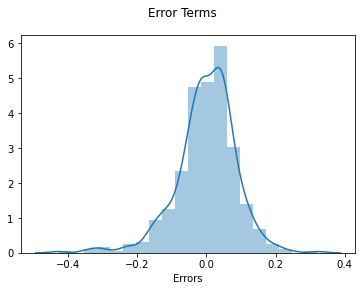

In [99]:
# plotting distplot for residuals
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins=20)
fig.suptitle('Error Terms')
plt.xlabel('Errors')
plt.show()

Comments:
- We can see that error terms are normally distributed and are centered around mean 0

#### Predictions on train data using sklearn:

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_new,y_train)

LinearRegression()

In [101]:
y_train_pred = lr.predict(X_train_new)

In [102]:
# Evaluating algorithm on train data
from sklearn import metrics

In [103]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

Mean Absolute Error:  0.06756990614146714
Mean Squared Error:  0.008214062661836285
Root Mean Squared Error:  0.09063146617944721


In [104]:
SS_Residual = sum((y_train-y_train_pred)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train_new.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8365879878728186 0.8326424262118002


In [105]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8365879878728185

Comments:
 - We can see that r-sqaure value we got from statsmodels is 0.837 and from sklearn is also 0.837, which are similar.
 - Adjusted r-sqared value we got on train data is 0.833
 - RMSE is 0.090
 - We will derive these values again for test data and compare them. 

#### Model prediction and evaluation on test data using sklearn:

In [106]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [107]:
# Rescaling the variables, but using only transform method
a = ['temp','hum','windspeed','cnt']
bike_test[a] = scaler.transform(bike_test[a])

In [108]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [109]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [111]:
y_test.shape

(220,)

In [112]:
X_test.shape

(220, 28)

In [113]:
# Keep only those variables in test data which we got in the final model i.e. 16th model
X_test_new = X_test[['yr','holiday','temp','windspeed','season_Spring','season_Summer','season_Winter','mnth_Sep','weekday_Mon','weekday_Tue','weathersit_LightSnow','weathersit_Mist']]

In [114]:
# Predictions on test data
lr = LinearRegression()
lr.fit(X_test_new,y_test)

LinearRegression()

In [115]:
y_test_pred = lr.predict(X_test_new)

In [116]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean Absolute Error:  0.07054056449474363
Mean Squared Error:  0.008505643798208038
Root Mean Squared Error:  0.09222604728713053


In [117]:
SS_Residual = sum((y_test-y_test_pred)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test_new.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8221108027596618 0.8117983855283378


In [118]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8221108027596618

Comments:
 - R-squared value of train data was 0.837 and of test data it is 0.822, which is almost near to each other
 - Also adjusted R-squared value of test data is 0.812 which is near to its R-Squared value
 - RMSE of train data was 0.090 and of test data is 0.092, which are again almost same 

In [119]:
########################### END of model using manual method (without RFE) ###############################

In [120]:
################################## Model using RFE Method ###############################################

### Now build a model using RFE method:

In [121]:
# Import RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [122]:
lm = LinearRegression()

In [123]:
lm.fit(X_train,y_train)

LinearRegression()

In [124]:
rfe = RFE(lm,15)

In [125]:
rfe = rfe.fit(X_train,y_train)

In [126]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 10),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

In [127]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [128]:
# X_train.columns[~rfe.support_]

### Building model using statsmodel

In [129]:
X_train_rfe = X_train[col]

In [130]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [131]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_LightSnow,weathersit_Mist
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


#### Using RFE - Model - #1

In [132]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [133]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          8.15e-189
Time:                        15:59:50   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3197 

In [134]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_Spring,4.37
7,season_Winter,4.06
6,season_Summer,2.82
14,weathersit_Mist,2.32
0,yr,2.09
11,mnth_Nov,1.85
9,mnth_Jan,1.75


#### Using RFE - Model - #2

In [135]:
# Building another model excluding hum

In [136]:
X_train_rfe = X_train_rfe.drop('hum',axis=1)


In [137]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.75e-186
Time:                        15:59:50   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2450 

In [138]:
col = ['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_LightSnow', 'weathersit_Mist']
vif = pd.DataFrame()
vif['features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_Winter,2.95
4,season_Spring,2.89
5,season_Summer,2.24
0,yr,2.07
10,mnth_Nov,1.81
8,mnth_Jan,1.66
9,mnth_Jul,1.59
13,weathersit_Mist,1.57


#### Using RFE - Model - #3

In [139]:
# Building another model excluding 'mnth_Nov'
X_train_rfe = X_train_rfe.drop('mnth_Nov',axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.74e-186
Time:                        15:59:51   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2283 

#### Using RFE - Model - #4

In [140]:
# Building another model excluding 'mnth_Dec'
X_train_rfe = X_train_rfe.drop('mnth_Dec',axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          8.14e-187
Time:                        15:59:51   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2154 

In [141]:
col = ['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jan', 'mnth_Jul',
       'mnth_Sep', 'weathersit_LightSnow', 'weathersit_Mist']
vif = pd.DataFrame()
vif['features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,5.13
3,windspeed,4.62
4,season_Spring,2.75
5,season_Summer,2.24
0,yr,2.07
6,season_Winter,1.78
7,mnth_Jan,1.61
8,mnth_Jul,1.59
11,weathersit_Mist,1.56
9,mnth_Sep,1.34


#### Using RFE - Model - #5

In [142]:
# Building another model excluding 'mnth_Jan'
X_train_rfe = X_train_rfe.drop('mnth_Jan',axis=1)
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          5.06e-187
Time:                        15:59:51   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1994 

In [143]:
col = ['yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weathersit_LightSnow', 'weathersit_Mist']
vif = pd.DataFrame()
vif['features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_Summer,2.23
4,season_Spring,2.08
0,yr,2.07
6,season_Winter,1.78
7,mnth_Jul,1.58
10,weathersit_Mist,1.55
8,mnth_Sep,1.34
9,weathersit_LightSnow,1.08


In [144]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_rfe,y_train)

LinearRegression()

In [145]:
y_train_pred_rfe = lr.predict(X_train_rfe)

In [146]:
# Evaluating algorithm on train data - using RFE method
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train,y_train_pred_rfe))
print('Mean Squared Error: ', metrics.mean_squared_error(y_train,y_train_pred_rfe))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred_rfe)))


Mean Absolute Error:  0.06769653472957284
Mean Squared Error:  0.00827971071891712
Root Mean Squared Error:  0.09099291576225657


In [147]:
SS_Residual = sum((y_train-y_train_pred_rfe)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train_rfe.shape[1]-1)
print(r_squared, adjusted_r_squared)


0.8352819738403641 0.8313048786413386


In [148]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred_rfe)

0.835281973840364

In [149]:
## Evaluation on test data - using RFE method

In [150]:
X_test_rfe = X_test[['yr','holiday','temp','windspeed','season_Spring','season_Summer','season_Winter','mnth_Jul','mnth_Sep','weathersit_LightSnow','weathersit_Mist']]

In [151]:
# Predictions on test data
lr = LinearRegression()
lr.fit(X_test_rfe,y_test)


LinearRegression()

In [152]:
y_test_pred_rfe = lr.predict(X_test_rfe)


In [153]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_test_pred_rfe))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_test_pred_rfe))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_rfe)))


Mean Absolute Error:  0.07022943459576539
Mean Squared Error:  0.008560343573260633
Root Mean Squared Error:  0.09252212477705338


In [154]:
SS_Residual = sum((y_test-y_test_pred_rfe)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test_rfe.shape[1]-1)
print(r_squared, adjusted_r_squared)


0.8209667977549631 0.8114986957131582


In [155]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred_rfe)

0.8209667977549632

Comments:
 - R-squared value of test data is 0.821 and of train data it was 0.835, which are almost near
 - adjusted R-squared value of test data is 0.811 which is near to R-squared
 - RMSE of test data is 0.092 and of train data it was 0.090, which are almost same
 - Also, we have got almost similar r-squared and adjusted r-squared values using manual method and RFE method

Comments:
- Significant variables in predicting demands for shared bikes:
    - Variables got via manual method (Model #16): yr, holiday, temp, windspeed, season_Spring, season_Summer, season_Winter, mnth_Sep, weekday_Mon, weekday_Tue, weathersit_LightSnow, weathersit_Mist. We can also say that, **83.7%** of the variance in 'cnt' variable is explained by these predicted variables.
    - Variables got via RFE method (Using RFE - Model #5): yr, holiday, temp, windspeed, season_Spring, season_Summer, season_Winter, mnth_Jul, mnth_Sep, weathersit_LightSnow, weathersit_Mist. We can also say that, **82.1%** of the variance in 'cnt' variable is explained by these predicted variables. 